# Facebook Prophet
March 1st 2022

Facebook Prophet is an **general additive model** that includes a number of highly advanced, intelligent forecasting methods, incluiding changepoint analysis.  
_y = g(t) + s(t) + h(t) + $\epsilon_t$_  
Here g(t) => the **trend** function which models non-periodic changes, s(t) => **periodic** changes (e.g. weekly and yearly seasonality), and h(t) => represents the effects of **holidays** (which occur on potentially irregular scheadules over one or more days)

Prophet was optimized with the **business forecast tasks**, typically following the next features:
* We need a bit of data, at least a year. With hourly, daily, or weekly observations
* Strong multiple human scale seasonality (e.g. week day)
* Important holidays that occur at irregular intervals 
* A reasonable number of missing observations or large outliers
* Historical changes may not persist and die out
* Trends that are non-linear growth curves

In [92]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_3/3_fb_prophet


In [3]:
# Custom functions:
import src.colorsetup

## Input data
Peyton Manning (football player) data 

In [31]:
data_path = 'https://raw.githubusercontent.com/PinkWink/DataScience/master/data/07.%20example_wp_peyton_manning.csv'
peyton = pd.read_csv(data_path)
print("Data shape: {}".format(peyton.shape))
peyton.head()

Data shape: (2905, 2)


,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


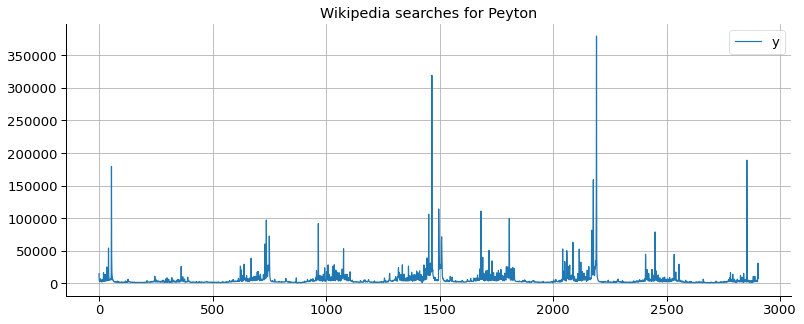

In [32]:
peyton.plot()
plt.title("Wikipedia searches for Peyton")
plt.grid()
plt.show()

In [33]:
# Let's do a log transformation
peyton['y']= np.log(peyton['y'])
peyton.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


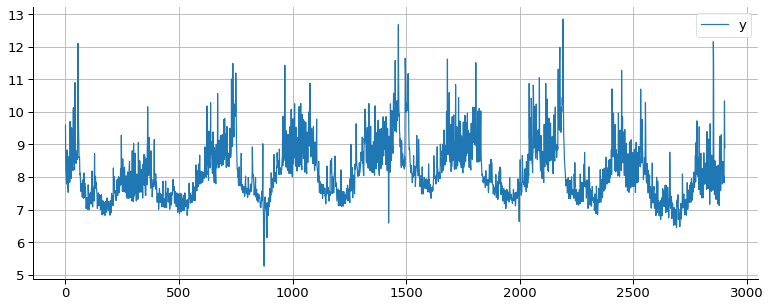

In [34]:
peyton.plot()
plt.grid()
plt.show()

## Fitting model

In [16]:
m= Prophet()
m.fit(peyton)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7974.93    0.00522198       273.476           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7990.67    0.00148532       245.234           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7996.38     0.0268052       275.287           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8000.03    0.00121159       104.247     0.08191      0.6876      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8002.15     0.0172126       916.539      0.4757           1      627   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [35]:
# Forecast 365 days into future
# prophet requires a blank df to input predictions
future= m.make_future_dataframe(periods= 365)
# display(peyton)
# display(future.head())
# display(future.tail())

In [36]:
# Populate forecast
forecast= m.predict(future)
display(forecast.head())
print(forecast.columns)

/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041723,8.211497,9.497817,8.041723,8.041723,0.803371,0.803371,0.803371,0.352297,0.352297,0.352297,0.451075,0.451075,0.451075,0.0,0.0,0.0,8.845094
1,2007-12-11,8.040173,7.957589,9.220290,8.040173,8.040173,0.553432,0.553432,0.553432,0.119639,0.119639,0.119639,0.433793,0.433793,0.433793,0.0,0.0,0.0,8.593605
2,2007-12-12,8.038622,7.761505,9.005610,8.038622,8.038622,0.350784,0.350784,0.350784,-0.066662,-0.066662,-0.066662,0.417446,0.417446,0.417446,0.0,0.0,0.0,8.389406
3,2007-12-13,8.037072,7.724488,8.982908,8.037072,8.037072,0.330220,0.330220,0.330220,-0.072256,-0.072256,-0.072256,0.402476,0.402476,0.402476,0.0,0.0,0.0,8.367292
4,2007-12-14,8.035522,7.760046,8.970488,8.035522,8.035522,0.319724,0.319724,0.319724,-0.069567,-0.069567,-0.069567,0.389291,0.389291,0.389291,0.0,0.0,0.0,8.355246


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.220999,7.526107,8.978589
3266,2017-01-16,8.546104,7.873067,9.291396
3267,2017-01-17,8.333578,7.665820,9.089762
3268,2017-01-18,8.166261,7.480847,8.864229
3269,2017-01-19,8.178261,7.500126,8.936984


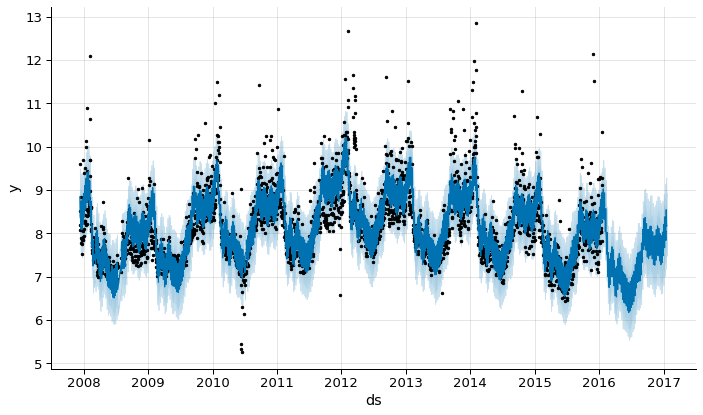

In [38]:
forecast_plot= m.plot(forecast)

/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


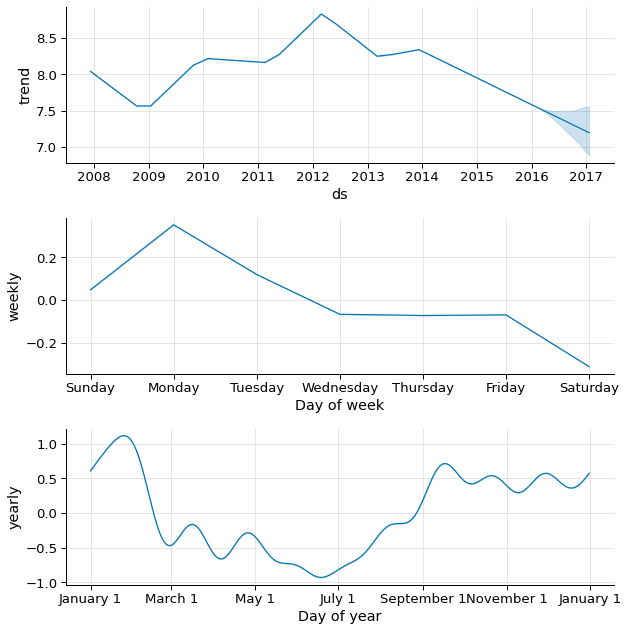

In [39]:
forecast_components= m.plot_components(forecast)

## Add Holidays information
In our case playoffs and superbowls dates

In [46]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0, # these help us specify spillover into previous and future days which will be treated as own holidays
  'upper_window': 1,
})

# display(playoffs)

superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

# display(superbowls) 
holidays= pd.concat((playoffs, superbowls))
holidays.head()

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1


In [53]:
# fit and predict
m= Prophet(holidays= holidays)
forecast = m.fit(peyton).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8124.42     0.0087342       416.571           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8141.61     0.0270425       1334.91           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8145.7   0.000586478       65.5886           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8150.54    0.00398536       136.589           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8152.68    0.00126441       153.168           1           1      606   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [55]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'playoff',
       'playoff_lower', 'playoff_upper', 'superbowl', 'superbowl_lower',
       'superbowl_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [61]:
# We want to see the holiday effects:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'yhat','playoff', 'superbowl']].tail()

,ds,yhat,playoff,superbowl
2902,2016-01-18,10.652861,1.899107,0.000000
2908,2016-01-24,9.786812,1.231399,0.000000
2909,2016-01-25,10.779929,1.899107,0.000000
2922,2016-02-07,10.682223,1.231399,1.177448
2923,2016-02-08,11.898098,1.899107,1.476125


/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


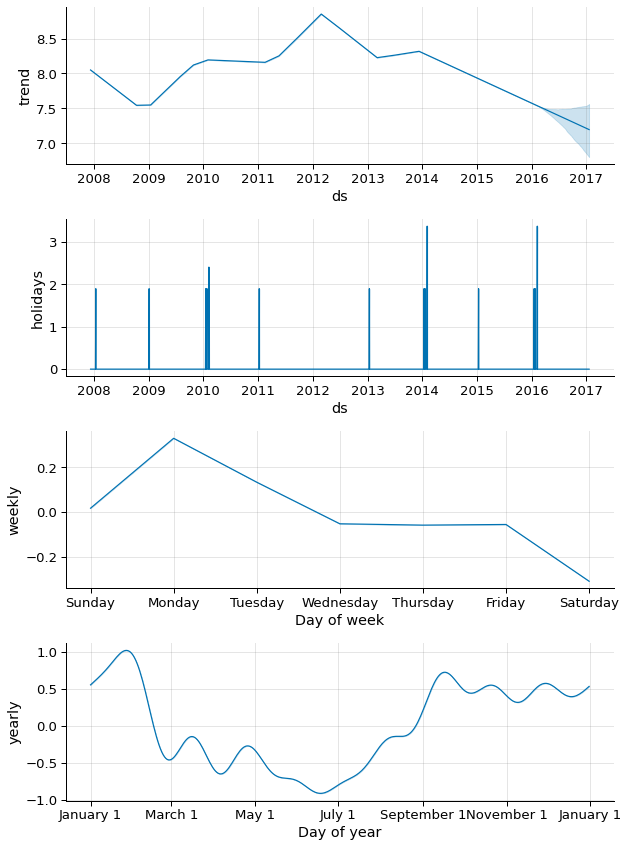

In [63]:
forecast_components= m.plot_components(forecast)

Peyton won Superbowls: 2016. While losing 2010 and 2014.

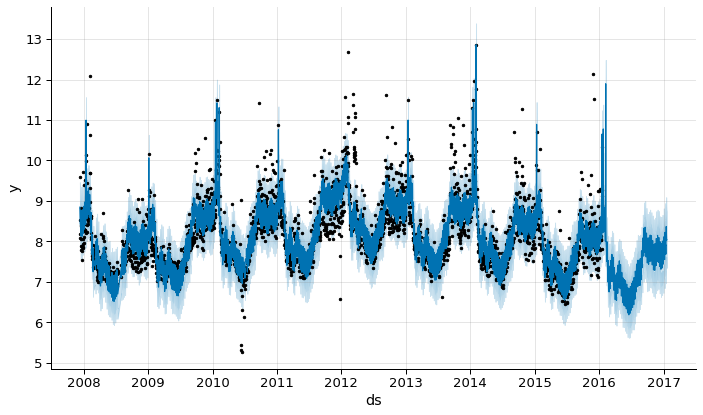

In [62]:
forecast_plot= m.plot(forecast)

## Add another seasonality
Besides yearly, weekly, and daily. Let's add monthly seasonality

In [65]:
m= Prophet(holidays= holidays)
# Increasing the number of Fourier components allows the seasonality to change more quickly (at risk of overfitting). Default values for yearly
# and weekly seasonalities are 10 and 3 respectively.
m.add_seasonality(name= 'monthly', period= 30.5, fourier_order= 5)
m.fit(peyton)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8131.02    0.00591133       687.552           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8153.09     0.0147399       267.465           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       8154.62   7.28594e-05       163.188   9.701e-07       0.001      314  LS failed, Hessian reset 
     299       8157.87   0.000558416       169.808           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387        8161.9   3.60588e-05       114.381    3.91e-07       0.001      547  LS failed, Hessian reset 
     399       8162.04   0.000206506       107.939      0.4484      0.4484      562   
    Iter      log pro

ian reset 
     763       8166.35   4.15958e-07       56.2082      0.3447           1     1204   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [66]:
fcst_month = m.predict(future)

/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


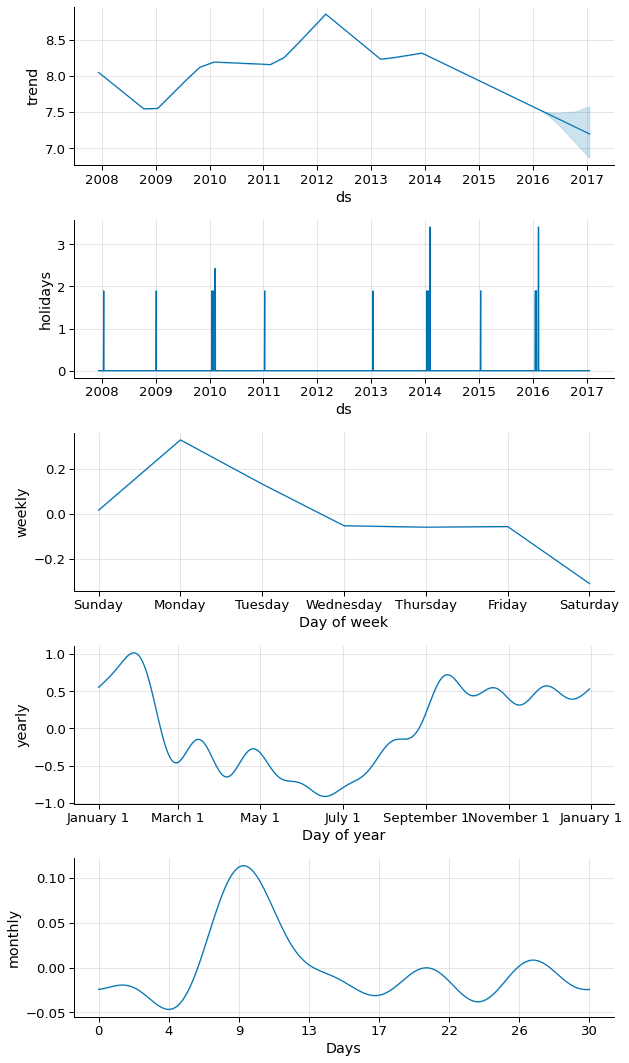

In [68]:
monthly_components= m.plot_components(fcst_month)

## Adding a regressor

In [78]:
# creating an indicator variable for NFL sundays
def nfl_sundays(ds):
    """
    NFL season: August, September, October, November, December, January, February
    Sunday => 6 | range: 0-6 => Monday-Sunday
    """
    date= pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else: 
        return 0

In [81]:
peyton['nfl_sunday']= peyton['ds'].apply(nfl_sundays)
peyton.head()

,ds,y,nfl_sunday
0,2007-12-10,9.590761,0
1,2007-12-11,8.519590,0
2,2007-12-12,8.183677,0
3,2007-12-13,8.072467,0
4,2007-12-14,7.893572,0


In [83]:
m= Prophet()
m.add_regressor('nfl_sunday')
m.fit(peyton)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8011.73    0.00178264       1448.74       0.238       0.238      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          8028    0.00164993       192.912      0.9033      0.9033      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8033.36    0.00136526       366.297      0.3074      0.6411      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8037.22   0.000292967       115.163           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8038.77   0.000411007        101.37      0.6421      0.6421      612   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pa

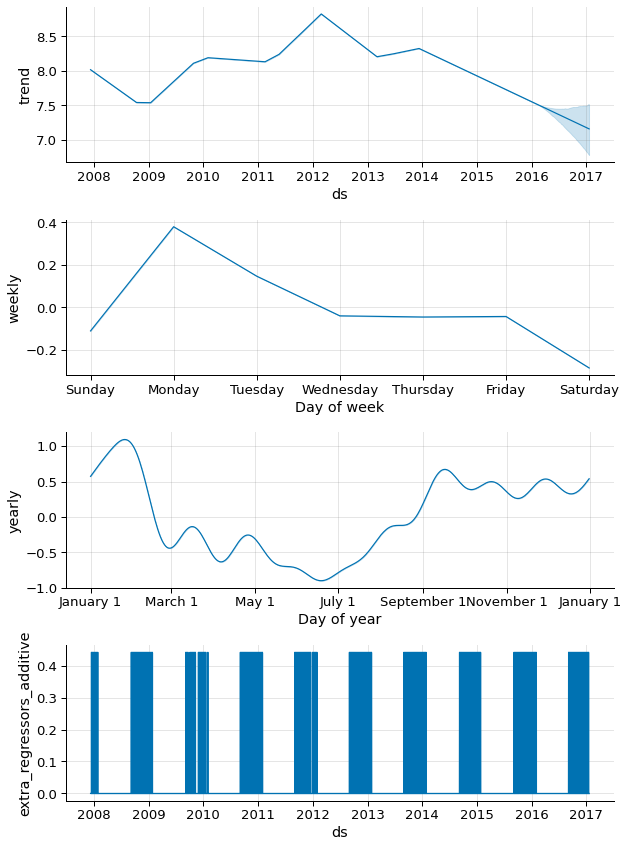

In [90]:
# Regressor must also be available in future df
future['nfl_sunday'] = future['ds'].apply(nfl_sundays)
forecast = m.predict(future)
fig = m.plot_components(forecast)

## We can specifiy if there's some change taking place
For instance COVID

In [91]:
# These are points where trend has changed
print('originally: ',m.changepoints[:5])

# you can specify changepoints if you want trend to only be allowed at certain points
m_c = Prophet(changepoints=['2014-01-01'])

print('\nnow: ',m_c.changepoints[:5])

originally:  93    2008-03-17
186   2008-06-20
279   2008-10-11
372   2009-01-14
465   2009-04-17
Name: ds, dtype: datetime64[ns]

now:  0   2014-01-01
Name: ds, dtype: datetime64[ns]
